# Plotting election results

Data regarding election results are obtained from [this](https://www.bbc.com/news/election/us2020/results) table (BBC news)

Data is copied and tasted into txt file which is processed and turned into .csv

Inputs for this code are:
* .csv with election results from specified source
*  File `bbc_state_mappings.csv` to map names from source to state abbreviations

In [1]:
using DataFrames             
using CSV  

State mappings are loaded

In [2]:
mappings = CSV.read("./mappings/bbc_state_mappings.csv");

Data from file is read

In [3]:
data = CSV.read("./data/bbcnov11.csv"); # choose most recent dataset

Both datasets are observed. They will be merged on `State`. This is the name provided by the BBC dashboard to the different states. It is easier to work with state abreviations, that is why the mapping is done.

In [4]:
head(mappings)

,State,MatchedAbbreviation,FullName,ElectoralVotes
,String,String,String,Int64
1,Ala,AL,Alabama,9
2,Alaska,AK,Alaska,3
3,Ariz,AZ,Arizona,11
4,Ark,AR,Arkansas,6
5,Calif,CA,California,55
6,Colo,CO,Colorado,9


In [5]:
head(data)

,State,Dem,Rep,PerCounted
,String,Int64,Int64,Int64
1,Calif,65,33,89
2,N.Y,56,43,84
3,Ill,55,43,90
4,Va,54,44,99
5,Wash,59,39,96
6,N.J,58,40,80


Both datasets are merged

In [6]:
data_merged = join(data, mappings, on = :State);
head(data_merged)

,State,Dem,Rep,PerCounted,MatchedAbbreviation,FullName,ElectoralVotes
,String,Int64,Int64,Int64,String,String,Int64
1,Calif,65,33,89,CA,California,55
2,N.Y,56,43,84,NY,New York,29
3,Ill,55,43,90,IL,Illinois,20
4,Va,54,44,99,VA,Virginia,13
5,Wash,59,39,96,WA,Washington,12
6,N.J,58,40,80,NJ,New Jersey,14


`State` column to be eliminated and `Matched Abbreviation` column will be remaned as `State`

In [7]:
data_no_state_name = select!(data_merged, Not(:State));

Final dataframe will be created with necessary columns and in clean order.

In [8]:
column_data = hcat(data_no_state_name[:, :MatchedAbbreviation], data_no_state_name[:, :FullName], data_no_state_name[:, :Dem], data_no_state_name[:, :Rep],data_no_state_name[:, :ElectoralVotes], data_no_state_name[:, :PerCounted]);

In [9]:
column_names = ["state", "state_name", "percentage_democrat", "percentage_republican", "electoral_votes", "percentage_votes_counted"];

Clean dataset is obtained

In [10]:
df = DataFrame(column_data, column_names);
head(df)

,state,state_name,percentage_democrat,percentage_republican,electoral_votes
,Any,Any,Any,Any,Any
1,CA,California,65,33,55
2,NY,New York,56,43,29
3,IL,Illinois,55,43,20
4,VA,Virginia,54,44,13
5,WA,Washington,59,39,12
6,NJ,New Jersey,58,40,14


### New columns are obtained for easier interpretation

`percentage_difference` indicates Democrat-Republican percentages

In [11]:
df[:, [:percentage_democrat, :percentage_republican]] = df[:, [:percentage_democrat, :percentage_republican]]./100; # Dividing by 100 to get percentages

In [12]:
df[:, :percentage_difference] = df[:, :percentage_democrat] - df[:, :percentage_republican];

In [13]:
head(df[:, [:state_name,:percentage_democrat,:percentage_republican, :percentage_difference, :electoral_votes]])


,state_name,percentage_democrat,percentage_republican,percentage_difference,electoral_votes
,Any,Any,Any,Float64,Any
1,California,0.65,0.33,0.32,55
2,New York,0.56,0.43,0.13,29
3,Illinois,0.55,0.43,0.12,20
4,Virginia,0.54,0.44,0.1,13
5,Washington,0.59,0.39,0.2,12
6,New Jersey,0.58,0.4,0.18,14


`state_winner` indicates D or R depending on winning party for state

In [14]:
df[:, :state_winner] = "D";

In [15]:
df[ df[:,:percentage_republican].>df[:,:percentage_democrat], :state_winner] = "R";

### Plot is created (Plots library)

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


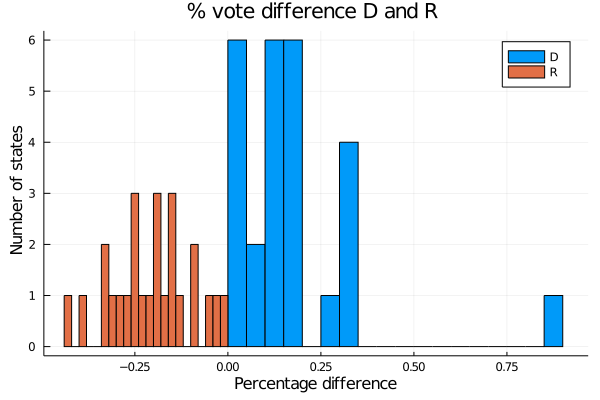

In [16]:
using Plots
# Works with Plots library
histogram(df[:, :percentage_difference],bins = 20, group =df[:, :state_winner], title= "% vote difference D and R ", xlab = "Percentage difference", ylab = " Number of states")

The histogram weights function is a current bug in Plots library


In [17]:
#histogram(df[:, :percentage_difference], weights=df[:, :electoral_votes], label=["D" "R"])

For this reason, each line in the dataset will be repeated `electoral_votes` amount of times

In [20]:
total_electoral_votes = sum(df[:,:electoral_votes])

538

In [32]:
hist_items = Array{Any}(undef, total_electoral_votes, 2); # 2 columns: percentage difference and R/D

In [33]:
size(df,1)

51

In [34]:
state_info = df[1,:]

,state,state_name,percentage_democrat,percentage_republican,electoral_votes
,Any,Any,Any,Any,Any
1,CA,California,0.65,0.33,55


In [35]:
electoral_votes = state_info[:electoral_votes]

55

In [47]:
index = 0;
for i in 1:size(df,1)
    state_info = df[i,:]
    
    electoral_votes = state_info[:electoral_votes]
    
    for j in 1:electoral_votes
        hist_items[index+j,:] = [state_info[:percentage_difference], state_info[:state_winner]]
        
    end
    
    index = index + electoral_votes
    
end

In [52]:
df_for_histogram = DataFrame(hist_items, [:percentage_difference, :state_winner]);

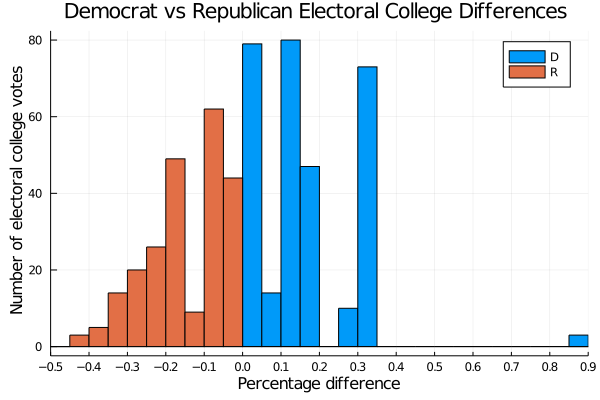

In [64]:
histogram(df_for_histogram[:, :percentage_difference],bins =-1:0.05:1, group =df_for_histogram[:, :state_winner], title= "Democrat vs Republican Electoral College Differences ", xlab = "Percentage difference", ylab = " Number of electoral college votes", xlims = (-0.5,0.9), xticks =-1:0.1:1 )

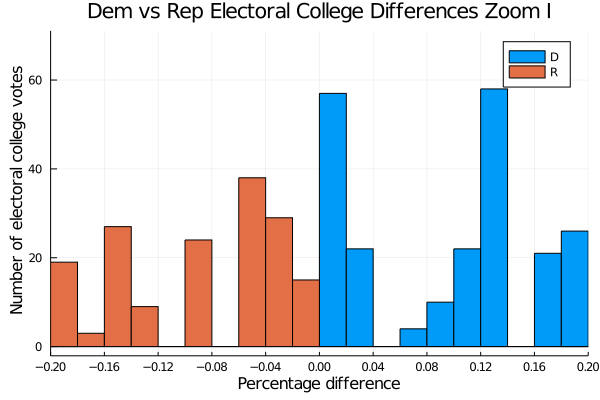

In [72]:
histogram(df_for_histogram[:, :percentage_difference],bins =-1:0.02:1, group =df_for_histogram[:, :state_winner], title= "Dem vs Rep Electoral College Differences Zoom I", xlab = "Percentage difference", ylab = " Number of electoral college votes", xlims = (-0.2,0.2), xticks =-1:0.04:1 )

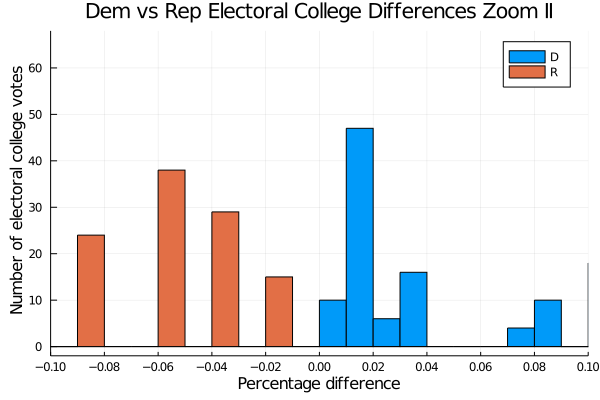

In [71]:
histogram(df_for_histogram[:, :percentage_difference],bins =-1:0.01:1, group =df_for_histogram[:, :state_winner], title= "Dem vs Rep Electoral College Differences Zoom II", xlab = "Percentage difference", ylab = " Number of electoral college votes", xlims = (-0.1,0.1), xticks =-1:0.02:1 )

Different districts for Maine and Nebrasca are not accounted for.

Democrats won 1 electoral vote in Nebraska and Republicans won 1 in Maine